# **Logistic Regression**


![alt](Images/logisticregression.png)

## What is logistic Regression?

- It's a supervised learning algorithm used for **classification**, there are two kinds **Univariate** and **Multivariate**
- being supervised means input and output columns are **labeled**
- it's cost finction is **log loss**
- it's target column is categorical and outcome is probablistic

## Regression? what is it?
The term "**regression**" indeed refers to the **process of modeling the relationship** between a **dependent** variable (also called the target or response variable) and one or more **independent** variables (also known as predictors or features). These independent variables can be continuous (e.g., height, age, temperature) or categorical (e.g., gender, type of occupation, yes/no answers).

## How are linear and logistic regression different?


[Understanding1](https://wisdomml.in/logistic-regression-explained-definition-and-examples/)
- What is Logistic Regression?
- Example of Logistic Regression
- Assumptions of Logistic Regression
- Types of Logistic Regression
- Difference between Logistic Regression and Linear Regression
- Applications of Logistic Regression
- FAQs

# ***Linear regression*** by **Gradient Descent**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Creating sample

In [2]:
X,y = make_regression(n_samples=20,n_features=1,n_targets=1, noise=20)
X,y

(array([[ 0.7989437 ],
        [-0.06509512],
        [ 1.06792937],
        [-1.56909796],
        [-0.63054185],
        [-0.01050331],
        [ 2.13378327],
        [-0.57602086],
        [-1.2395776 ],
        [-1.50506598],
        [-0.34915362],
        [ 1.41604377],
        [ 0.28328508],
        [-0.87359793],
        [-0.64216324],
        [-0.59638926],
        [ 0.64317899],
        [ 0.24609176],
        [ 0.49767416],
        [ 1.48339268]]),
 array([ 11.07282215, -27.26591375,  16.59895148, -57.87297327,
        -35.34457593,  -9.95155216,  93.00275071, -38.50103653,
        -43.0521679 , -48.65429347, -13.3068216 ,  17.12495548,
         36.47714658, -27.34240543, -47.47865773, -20.17142991,
         25.18651392,  -9.83539456,  39.18266294,  49.06887066]))

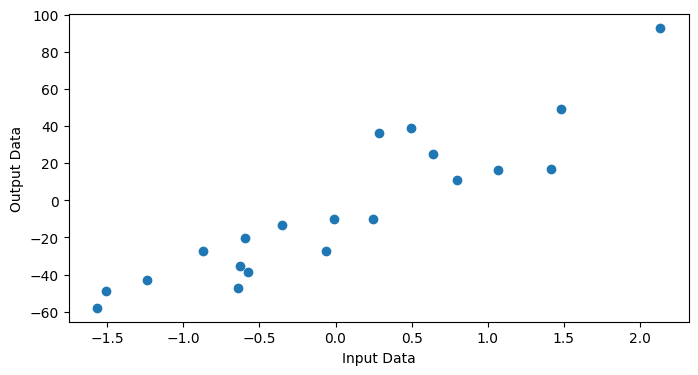

In [3]:
plt.figure(figsize=(8,4))
plt.scatter(X,y)
plt.xlabel("Input Data")
plt.ylabel("Output Data")
plt.show()

### Values to be used

In [4]:
epochs = 100
lr = 0.1
m= 2.43
c= 9.34
epochs,lr,m,c

(100, 0.1, 2.43, 9.34)

> Do we have to calculate derivatives? Because that is part of calculating Gradient Descent

### Putting values in gradient descent formula

we dont have to make below code it is readily available to us!      -------------------------------Where to get pre written code

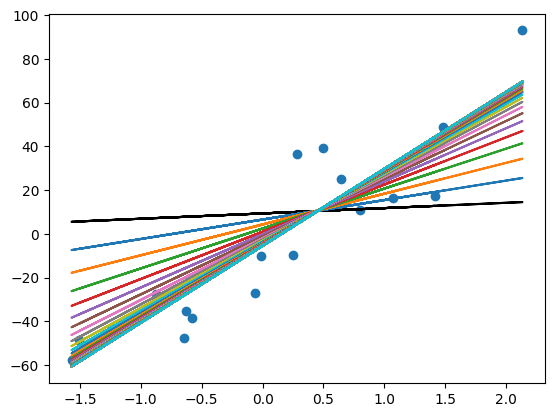

In [5]:
pred = m*X.ravel()+c
plt.scatter(X,y)
plt.plot(X,pred, color="black")
for i in range(epochs):
    derivatives_m = np.mean(-2*(y-m*X.ravel()-c)*X.ravel())
    derivatives_c = np.mean(-2*(y-m*X.ravel()-c))

    m=m-(lr*derivatives_m)
    c=c-(lr*derivatives_c)

    pred= m*X.ravel()+c
    plt.plot(X,pred)
plt.show()

Result of Linear Regression by ***Gradient Descent***

In [6]:
m,c

(35.1804211788277, -5.45570932002309)

In [7]:
model= LinearRegression()

In [8]:
model.fit(X,y)  

LinearRegression()

##### Compare values of m and c with model.coef_ , model.intercept_

In [9]:
model.coef_,model.intercept_

(array([35.18042119]), -5.4557093282701)

#### -------------------------- read Freeform notes from here

####  **LogLoss** is cost function for logistic regressioin 

# **Logistic Regresion** by **Gradient Descent**

### Doing **Binary Classification Logistic Regression** by applying ***Gradient Descent*** on **LogLoss**


**LogLoss** is cost function of Logistic Regression 

We are doing this by typing the formulas ourselves

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [11]:
age = np.array([12, 34, 23, 56, 38, 45, 18, 26])
insurance = np.array([0, 1, 0, 1, 1, 1, 0, 0])

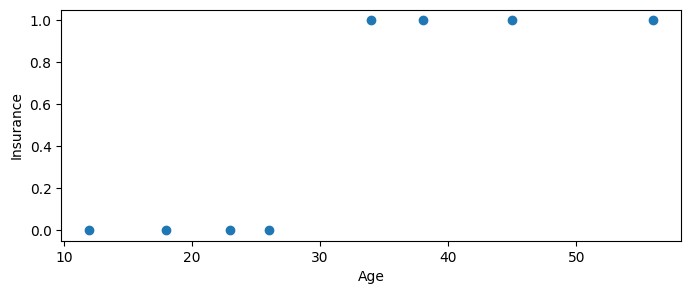

In [12]:
plt.figure(figsize=(8, 3))
plt.scatter(age, insurance, marker="o")
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.show()

In [13]:
lr = 0.5    # lr is learning rate
m = 3
c = 2
epochs = 500
cost_ls=[]

####  Applying gradient descent

In [14]:
for i in range(epochs):
    pred = 1 / (1+np.exp(-(m*age+c)))                                             # this is formula of LOGISTIC REGRESSION with x=age
    cost = -np.mean(insurance*np.log(pred)+(1-insurance)*np.log(1-pred))        # applying logloss function on logistic regresion
    cost_ls.append(cost)                                                        # value of cost function being aggregated in a list called 'cost'

    m_slope = -np.mean(age*(insurance-pred))                                
    c_slope = -np.mean(insurance-pred)

    m = m - (lr * m_slope)          # updating new value of m
    c = c - (lr * c_slope)          # updating new value of c


C:\Users\ALIE-n-WARE\AppData\Local\Temp\ipykernel_3368\3721226117.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(insurance*np.log(pred)+(1-insurance)*np.log(1-pred))        # applying logloss function on logistic regresion
C:\Users\ALIE-n-WARE\AppData\Local\Temp\ipykernel_3368\3721226117.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(insurance*np.log(pred)+(1-insurance)*np.log(1-pred))        # applying logloss function on logistic regresion


In [15]:
m,c

(1.0511610774039835, -31.409532800785733)

In [16]:
predictions = 1/(1+np.exp(-(m*age+c)))

In [17]:
predictions.round()

array([0., 1., 0., 1., 1., 1., 0., 0.])

In [18]:
cost    # last generated cost value

0.0038478870348748065

In [19]:
cost_ls

[nan,
 41.02343750005749,
 nan,
 nan,
 20.875003458074666,
 nan,
 nan,
 1.1991640128505083,
 nan,
 nan,
 75.91184804971495,
 nan,
 nan,
 55.76341054971069,
 nan,
 nan,
 35.614973050124064,
 nan,
 nan,
 15.46656064361131,
 nan,
 nan,
 2.103064645672177,
 99.99801318456113,
 nan,
 nan,
 79.84956901479683,
 nan,
 nan,
 59.701131514685514,
 nan,
 nan,
 39.55269401470133,
 nan,
 nan,
 19.40425746655917,
 nan,
 nan,
 0.41704140489634123,
 6.385842898828834,
 nan,
 nan,
 5.654657595946608,
 93.2997797542206,
 nan,
 nan,
 73.15134165431272,
 nan,
 nan,
 53.0029041543027,
 nan,
 nan,
 32.85446665447837,
 nan,
 nan,
 12.706040199074343,
 nan,
 nan,
 2.477095689981179,
 96.3079946643297,
 nan,
 nan,
 76.15954782793813,
 nan,
 nan,
 56.01111032778221,
 nan,
 nan,
 35.86267282779351,
 nan,
 nan,
 15.714236021013775,
 nan,
 nan,
 0.9134885101460624,
 78.5992791145992,
 nan,
 nan,
 58.45084161318749,
 nan,
 nan,
 38.302404113188715,
 nan,
 nan,
 18.153966688950984,
 nan,
 nan,
 0.18092375126907667,
 

#### Plotting change in Loss or Cost vs Epochs

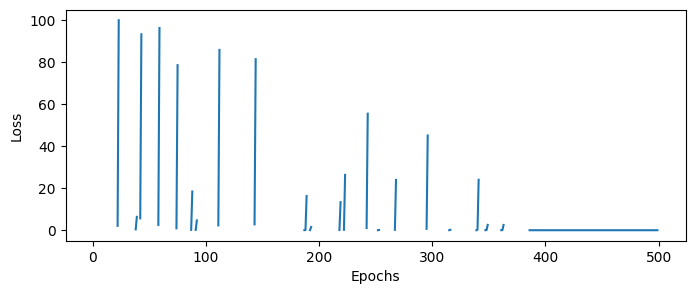

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(range(epochs), cost_ls)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [21]:
predictions

array([6.87344859e-09, 9.87002863e-01, 7.21953205e-04, 1.00000000e+00,
       9.99803488e-01, 9.99999875e-01, 3.76923997e-06, 1.66370722e-02])

#### Plotting actual data vs predicted data

Dots are actual value and lines are predicted value

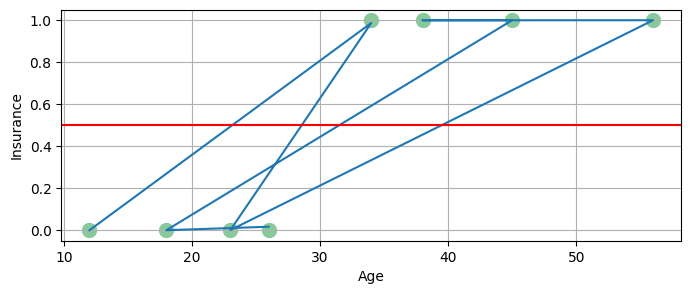

In [22]:
plt.figure(figsize=(8, 3))
plt.scatter(age, insurance, marker="o", color = '#88c999', s=100)     # plotting actual value
plt.plot(age, predictions)  # plotting predicted value
plt.xlabel("Age")
plt.axhline(0.5, color="red")
plt.ylabel("Insurance")
plt.grid()
plt.show()

In [23]:
age, insurance


(array([12, 34, 23, 56, 38, 45, 18, 26]), array([0, 1, 0, 1, 1, 1, 0, 0]))

In [24]:
sorted(age), sorted(insurance)

([12, 18, 23, 26, 34, 38, 45, 56], [0, 0, 0, 0, 1, 1, 1, 1])

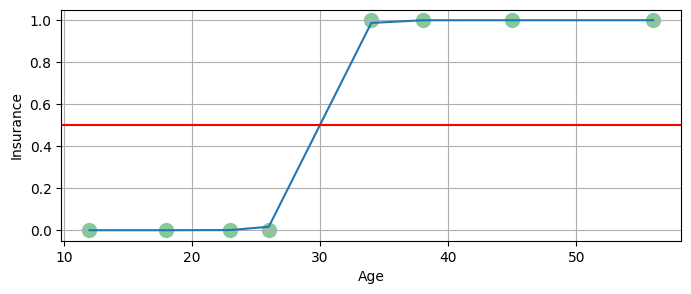

In [25]:
plt.figure(figsize=(8, 3))
plt.scatter(age, insurance, marker="o", color = '#88c999', s=100)     # plotting actual value
plt.plot(sorted(age), sorted(predictions))                            # plotting predicted value  
plt.xlabel("Age", )
plt.axhline(0.5, color="red")
plt.ylabel("Insurance")
plt.grid()
plt.show()

In [26]:
predictions = 1/(1+np.exp(-(m*age+c)))
predictions.round()

array([0., 1., 0., 1., 1., 1., 0., 0.])

In [27]:
# predictions = 1/(1+np.exp(-(m*age+c)))    
1/(1+np.exp(-(m*31+c)))  



0.76431081332047

#### **Applying logistic regression using predefined model**
This is how it will be applied at workplace

In [28]:
model = LogisticRegression()

In [29]:
model.fit(age.reshape(-1,1),insurance)      # we are reshaping age into 2d array as model.fit() accepts only ndarray as parameter i.e, reshape(-1,1)

LogisticRegression()

In [30]:
model.coef_

array([[0.6564214]])

In [31]:
model.intercept_

array([-19.72888779])

In [32]:
age.reshape(-1,1)

array([[12],
       [34],
       [23],
       [56],
       [38],
       [45],
       [18],
       [26]])

In [33]:
sklearn_pred = 1/(1+np.exp(-(model.coef_*age+model.intercept_)))
sklearn_pred.round()

array([[0., 1., 0., 1., 1., 1., 0., 0.]])

#### Applying accuracy score here!


In [34]:
accuracy_score(insurance,predictions.round())

1.0

In [35]:
insurance, predictions

(array([0, 1, 0, 1, 1, 1, 0, 0]),
 array([6.87344859e-09, 9.87002863e-01, 7.21953205e-04, 1.00000000e+00,
        9.99803488e-01, 9.99999875e-01, 3.76923997e-06, 1.66370722e-02]))

---
---
---


#### **Performing LOGISTIC REGRESSION on larger dataset**

#### Genereting Dataset

In [36]:
X,y = make_blobs(n_samples=200, n_features=1,centers=[[1,1],[3,5]])

In [37]:
X

array([[ 2.17822634e+00,  1.94368346e-01],
       [ 1.37129410e+00,  5.62517475e+00],
       [-1.30536224e+00,  3.94471716e-01],
       [ 4.60884453e+00,  4.61033531e+00],
       [ 3.05839750e+00,  4.66040701e+00],
       [ 1.00682384e+00,  8.88060031e-01],
       [ 2.29892491e+00,  5.51820005e+00],
       [-8.01263093e-02,  2.73108611e+00],
       [ 1.92522145e+00,  4.36906807e+00],
       [ 3.09236916e+00,  6.24403428e+00],
       [ 2.40028749e+00,  4.94245092e+00],
       [ 9.56758655e-01,  1.90329674e+00],
       [ 4.36866670e+00,  4.29196327e+00],
       [ 2.39261300e+00,  4.91410938e+00],
       [ 1.72662968e+00,  6.30078039e-01],
       [ 2.44895311e+00,  6.10956902e+00],
       [ 9.42855946e-01,  1.96229951e+00],
       [ 5.04944248e-03,  5.44945793e-01],
       [ 3.69165934e+00,  5.54431670e+00],
       [ 2.88408754e+00,  3.00703486e+00],
       [ 1.53011059e+00,  4.50561819e+00],
       [ 1.29814239e+00,  8.73653618e-01],
       [ 8.07373862e-01,  5.35408065e-02],
       [ 1.

In [38]:
y

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1])

# -------------------------Did not understand this code
why are we taking only 2nd column from X ?

while generating data we specified only one feature, shouldnt X have only one column, but as we can see it' s 2d ie have 2 columns?

In [39]:
len(X),len(X[:,1]),len(y)


(200, 200, 200)

In [40]:
X = X[:,1]

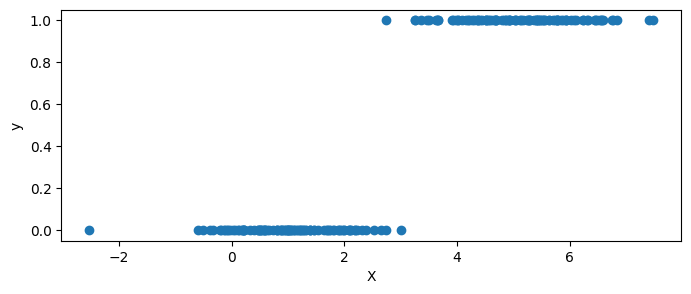

In [41]:
plt.figure(figsize=(8, 3))
plt.scatter(X, y, marker="o")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Logistic regression on large data set terminated here

---
---
---

#### Applying GRADIENT DESCENT

In [42]:
lr = 0.5
m = 3
c = 2
epochs = 2000

for i in range(epochs):
    pred = 1 / (1+np.exp(-(m*X+c)))
    
    m_slope = -np.mean(X*(y-pred))
    c_slope = -np.mean(y-pred)

    m = m - (lr * m_slope)
    c = c - (lr * c_slope)

In [43]:
m, c

(3.5731739373712195, -10.36552074828117)

In [44]:
predictions = 1/(1+np.exp(-(m*X+c)))

In [45]:
predictions

array([6.30821997e-05, 9.99940781e-01, 1.28943834e-04, 9.97779964e-01,
       9.98142981e-01, 7.51770217e-04, 9.99913213e-01, 3.52772369e-01,
       9.94758641e-01, 9.99993512e-01, 9.99321343e-01, 2.75260505e-02,
       9.93107538e-01, 9.99249070e-01, 2.99187063e-04, 9.99989510e-01,
       3.37682306e-02, 2.20733294e-04, 9.99920945e-01, 5.93665144e-01,
       9.96775786e-01, 7.14077725e-04, 3.81399498e-05, 2.00419560e-04,
       9.99976163e-01, 5.00923524e-06, 5.83289651e-03, 9.34594563e-01,
       9.81260553e-01, 9.99093780e-01, 1.75939877e-03, 9.99965770e-01,
       1.10886526e-01, 9.98260342e-01, 9.96864106e-01, 9.99260606e-01,
       5.69788574e-04, 3.82196017e-02, 5.01211732e-05, 9.86469386e-05,
       1.09246208e-03, 2.46624977e-03, 1.76979281e-04, 8.38214212e-01,
       1.32053451e-03, 2.02895325e-01, 2.76445982e-05, 2.35548433e-05,
       7.02009458e-05, 9.93585893e-06, 7.30397523e-03, 9.99999895e-01,
       9.98329894e-01, 9.96770045e-01, 5.74936844e-02, 9.99806364e-01,
      

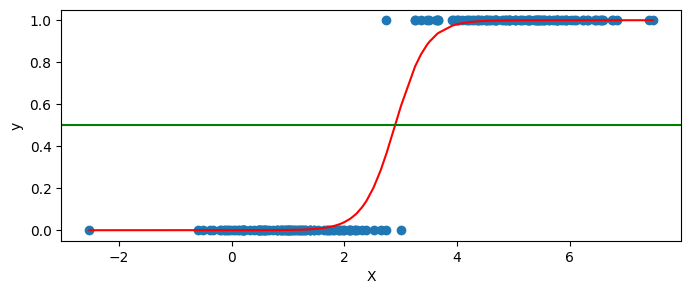

In [46]:
plt.figure(figsize=(8, 3))
plt.scatter(X, y, marker="o")
plt.plot(sorted(X), sorted(predictions), color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.axhline(0.5, color="green")
plt.show()

# Doing **Multiclass Classification Logistic Regression** by ***Gradient Descent***

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

We will directly use gradietn descent directly without coding it from scratch as done in industry

In [48]:
iris = load_iris()

In [49]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [50]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In this case class distribution is equal so no problem but what if it's not equal?

![alt](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*nfK3vGZkTa4GrO7yWpcS-Q.png)

In [51]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [52]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
df = pd.DataFrame(iris.data, columns=["Sep_len", "Sep_wid", "Pet_len", "Pet_wid"])
df

,Sep_len,Sep_wid,Pet_len,Pet_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
df["Target"] = iris.target
df["Target"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int32

In [55]:
df

,Sep_len,Sep_wid,Pet_len,Pet_wid,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Comparing data according to "pettels" and "sepels"

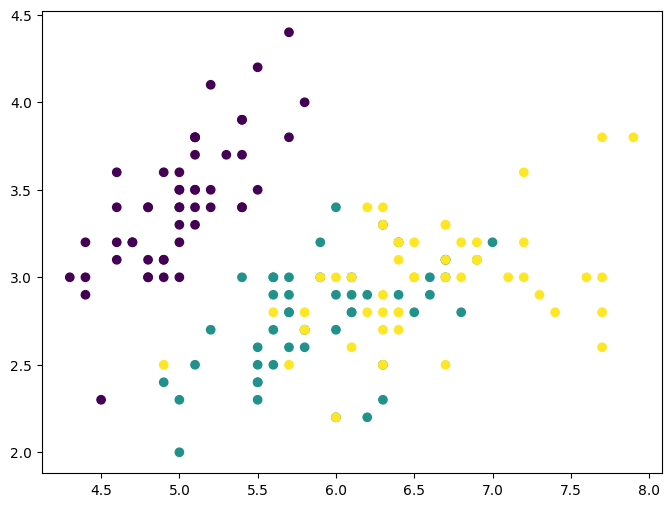

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Sep_len"], df["Sep_wid"], c=df["Target"])   # dots are colored according to categories in target columns
plt.show()

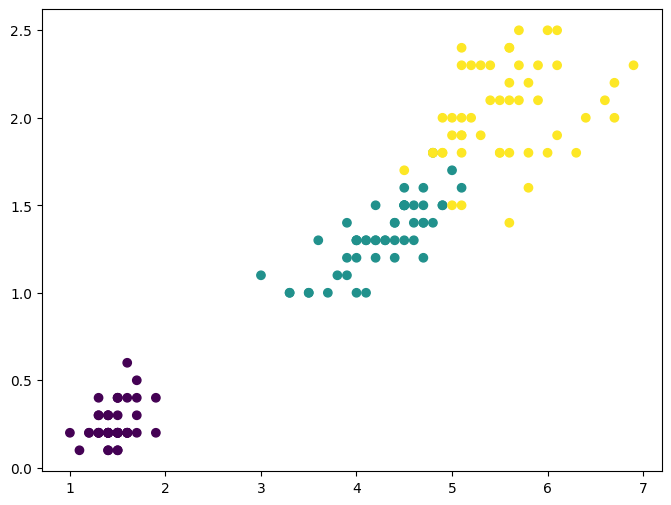

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Pet_len"], df["Pet_wid"], c=df["Target"])   # dots are colored according to categories in target columns
plt.show()

Creating model

In [58]:
model = LogisticRegression()

In [59]:
model.fit(X,y)

LogisticRegression()

### Getting prediction output from model

In [60]:
pred = model.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
accuracy_score(y,pred)

0.9733333333333334

In [62]:
pred_prob = model.predict_proba(X)

In [63]:
np.round(pred_prob[0], decimals=6)

array([0.981781, 0.018219, 0.      ])

#### What is the probablity an input value being in a particular category or class?

This is the prediction

In [64]:
pred[70]

2

These are the probablities

In [65]:
pred_prob[70]

array([0.00227749, 0.44058243, 0.55714008])

In [66]:
df["Target"].value_counts()

Target
0    50
1    50
2    50
Name: count, dtype: int64

As we can see, sum of all the probablities is 1.

In [67]:
0.00227749 + 0.44058243 + 0.55714008

1.0